#Market Veri Analizi

In [14]:
import pandas as pd #veri ön işleme
import numpy as np#lineer işlemler
import plotly.express as px  #verileri görseleştirmek için
from textblob import TextBlob #duyarlılık analizi

In [15]:
dff=pd.read_csv("customer_shopping_data.csv")#dosyamız pandas ile okundu

In [16]:
dff.shape #kaç satır kaç sütun olduğu gösterildi

(99457, 10)

In [17]:
dff.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

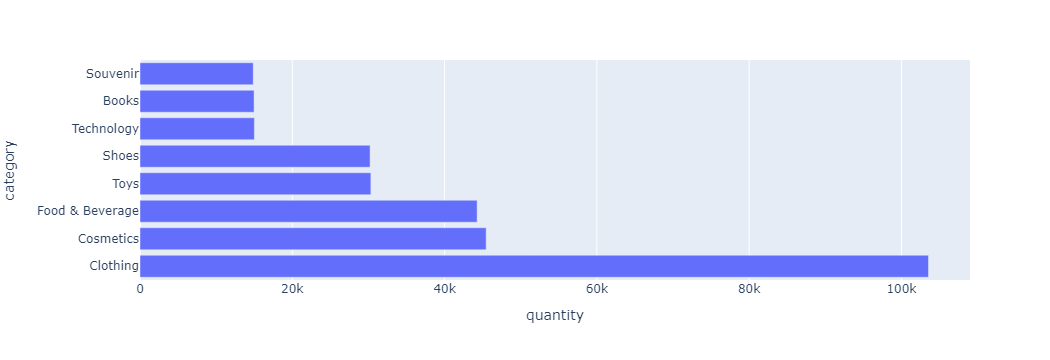

In [18]:
sales_by_product = dff.groupby('category')['quantity'].sum().reset_index()#her ürün için satış sayısı
sales_by_product = sales_by_product.sort_values('quantity', ascending=False)#Satış sayısına göre ürünleri sıralama
fig = px.bar(sales_by_product, x='quantity', y='category', orientation='h')# Yatay çubuk grafiğini oluşturma
fig.show()#yatay çubuk grafiği gösterme

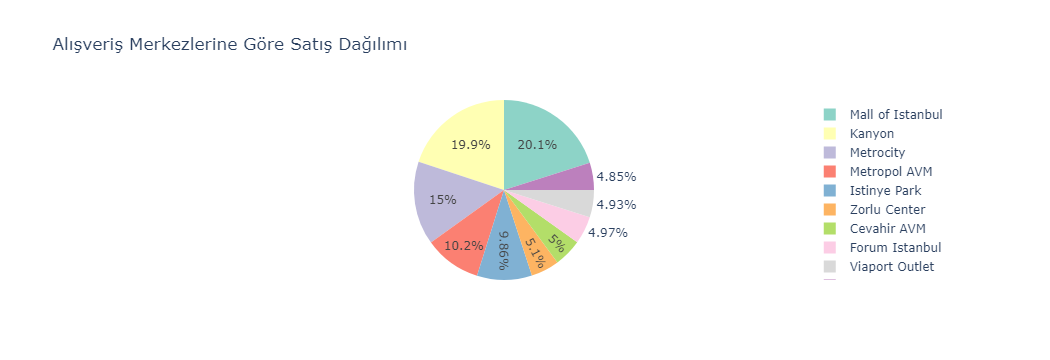

In [19]:

sales_by_mall = dff.groupby('shopping_mall')['quantity'].sum().reset_index()# Her ürün için satış sayısını hesaplama
sales_by_mall = sales_by_mall.sort_values('quantity', ascending=False)# Satış sayısına göre ürünleri sıralama
fig = px.pie(sales_by_mall, values='quantity', names='shopping_mall',# Pasta grafiğini oluşturma
             title='Alışveriş Merkezlerine Göre Satış Dağılımı',
                 color_discrete_sequence = px.colors.qualitative.Set3)
fig.show()# Grafiği gösterin

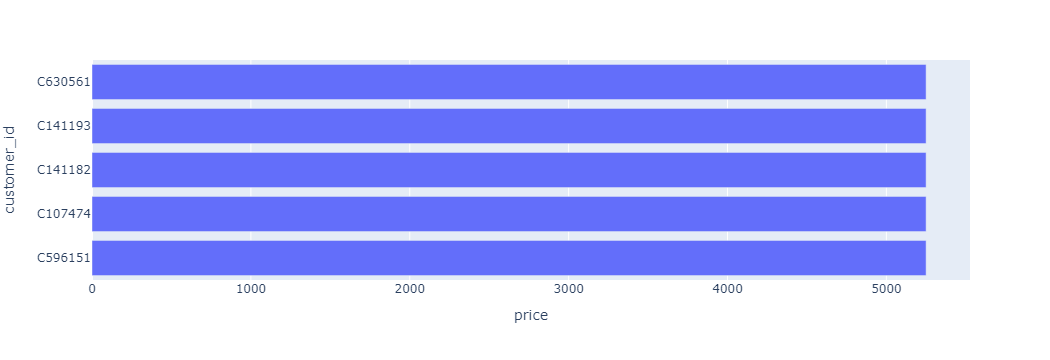

In [27]:
purchases_by_customer = dff.groupby('customer_id')['price'].sum().reset_index()#Müşterinin ürün için satın alma tutarı
purchases_by_customer = purchases_by_customer.sort_values('price', ascending=False)#Satış fiyatına göre ürünleri sıralama
top_customers = purchases_by_customer.head(5)#en fazla satın alma yapan 5 müşteri
fig = px.bar(top_customers , x='price', y='customer_id', orientation='h')# Yatay çubuk grafiğini oluşturma
fig.show()#yatay çubuk grafiği gösterme